In [1]:
import pandas as pd
import os
import numpy as npdfType.head()
import statistics as stat

In [2]:

def diceThrow(M,s,sum_s,t):
    if (t==0):
        s.append(np.random.randint(1,7))
        sum_s.append(sum(s))
        t=t+1
    elif sum(s)<M:
        #print(s,t)
        s.append(np.random.randint(1,7))
        sum_s.append(sum(s))
        t=t+1        
    else:
        return t,sum(s),sum(sum_s),(1+t)/2,stat.mean(s),stat.mean(sum_s),stat.stdev(s),stat.stdev(sum_s)
    return diceThrow(M,s,sum_s,t)

In [3]:
s=[]
sum_s=[]

diceThrows,diceThrowSum,sumDiceThrowSum,meanDiceThrows,meanDiceThrowSum,meanSumdiceThrowSum,stdDevDiceThrowSum,stdDevsumDiceThrowSum=diceThrow(20,s,sum_s,0)


In [4]:
# Section 3
#1
print("Mean of the sum - M : ", meanSumdiceThrowSum-20, " when M is 20")
#2 
print("Std Dev of the sum - M : ", stdDevsumDiceThrowSum-20, " when M is 20")

#4
print("Mean of the number of rolls : ", meanDiceThrows, "  when M 0")

Mean of the sum - M :  -5.199999999999999  when M is 20
Std Dev of the sum - M :  -13.166260174692045  when M is 20
Mean of the number of rolls :  3.0   when M 0


In [5]:
s=[]
sum_s=[]

diceThrows,diceThrowSum,sumDiceThrowSum,meanDiceThrows,meanDiceThrowSum,meanSumdiceThrowSum,stdDevDiceThrowSum,stdDevsumDiceThrowSum=diceThrow(5000,s,sum_s,0)



In [6]:
#Section 3

#3
print("Mean of the number of rolls : ", meanDiceThrows, "  when M 5000")

#5
print("Mean of the sum - M : ", meanSumdiceThrowSum-5000, " when sum is 5000")
#6 
print("Std Dev of the sum - M : ", stdDevsumDiceThrowSum-5000, " when sum is 5000")



Mean of the number of rolls :  719.0   when M 5000
Mean of the sum - M :  -2502.8343771746695  when sum is 5000
Std Dev of the sum - M :  -3545.5167664327478  when sum is 5000


In [7]:
#Section 2

In [8]:
os.getcwdb()
df2016=pd.read_csv("calls_for_service_2016.csv")
df2017=pd.read_csv("calls_for_service_2017.csv")
df2018=pd.read_csv("calls_for_service_2018.csv")
df2019=pd.read_csv("calls_for_service_2019.csv")
df2020=pd.read_csv("calls_for_service_2020.csv")

/Users/aliasgherdalal/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Section 2-1: What fractions of the call are most common type?

In [9]:
print("Section 2-1: What fractions of the call are most common type: ", df2020["Type"].value_counts().max()/df2020["Type"].value_counts().sum())

Section 2-1: What fractions of the call are most common type:  0.23926753093150255


In [10]:
dfAll=[df2016,df2017,df2018,df2019,df2020]
dfMerged=pd.concat(dfAll)
dfMerged[dfMerged['NOPD_Item'].duplicated() == True].count()
dfMergedDeDup=dfMerged.drop_duplicates(subset='NOPD_Item',keep='first')

## Section 2: 2 How many duplicate rows were removed?

In [11]:
print("Section 2: 2 How many duplicate rows were removed: ", dfMerged["NOPD_Item"].count()-dfMergedDeDup["NOPD_Item"].count() )


Section 2: 2 How many duplicate rows were removed:  5724


## Section 2: 3 Work out the average (mean) response time in each district. What is the difference between the average response times of the districts with the longest and shortest times?


In [ ]:
dfMergedDeDup.count()
dfTime=pd.DataFrame()
dfTime[["PoliceDistrict","TimeCreate","TimeDispatch","TimeArrive"]]=dfMergedDeDup[["PoliceDistrict","TimeCreate","TimeDispatch","TimeArrive"]]
dfTime.head()



In [208]:
meanL=[]
meanL.append(dfTime.groupby('PoliceDistrict')["TimeResponse"].mean())
print("Difference average response times of the districts with the longest and shortest times: ",(max(meanL[0])-min(meanL[0])), " sec")

,PoliceDistrict,TimeCreate,TimeDispatch,TimeArrive
0,8,04/07/2016 09:24:16 PM,04/07/2016 09:26:29 PM,04/07/2016 09:37:10 PM
1,0,04/07/2016 09:56:49 PM,NaN,04/07/2016 09:56:49 PM
2,7,04/07/2016 10:00:09 PM,04/07/2016 10:03:15 PM,04/07/2016 10:12:58 PM
3,0,09/30/2016 02:06:54 AM,09/30/2016 02:07:09 AM,09/30/2016 02:06:54 AM
4,8,04/07/2016 10:48:36 PM,NaN,04/07/2016 10:48:36 PM


## Section 2: 4 What is the largest ratio of conditional probabilty of an event type given a district to unconditional probability of that event  ?

In [870]:
dfMergedDeDupFil = dfMergedDeDup[dfMergedDeDup.PoliceDistrict > 0]
dfMergedDeDupFil=dfMergedDeDupFil.groupby('Type_').filter(lambda x: len(x) >=100)

In [871]:
typeList=[]
countList=dfMergedDeDupFil.groupby('Type_')['Type_'].count()
typeList=countList.index.to_list()

In [872]:
max=0
for item in typeList:
    x=dfMergedDeDupFil[dfMergedDeDupFil['Type_']==item]['Type_'].count()/dfMergedDeDupFil['Type_'].count()
    y=(dfMergedDeDupFil[dfMergedDeDupFil['Type_']==item]['Type_'].count()/dfMergedDeDupFil['Type_'].count()*(1/(dfMergedDeDupFil[dfMergedDeDupFil['Type_']==item].groupby('PoliceDistrict')['Type_'].count()/dfMergedDeDupFil.groupby('PoliceDistrict')['Type_'].count()))).max()    
    if x>max:
        max=y

In [873]:
print("Largest Ratio: ", y)

Largest Ratio:  60.88326833908799


## Section 2:  5  What is the fraction of the 2016 volume that this decrease represents? The answer should be between 0 and 1. 

In [230]:
(df2020['TypeText'].value_counts()/df2016['TypeText'].value_counts()).min()



0.01644503894877646

## Section 2: 6 What is a median response (dispatch to arrival) in sec considering only valid (i.e. non-negative values ?

In [215]:
dfTime["TimeResponseDisptach"]=(pd.to_datetime(dfTime['TimeArrive'])-pd.to_datetime(dfTime['TimeDispatch'])).dt.total_seconds()


In [229]:
dfTime['TimeResponseDisptach'][dfTime['TimeResponseDisptach']>=0].median()

185.0

In [936]:
dfTime

,PoliceDistrict,TimeCreate,TimeDispatch,TimeArrive,TimeResponse,TimeResponseDisptach
0,8,04/07/2016 09:24:16 PM,04/07/2016 09:26:29 PM,04/07/2016 09:37:10 PM,774.0,641.0
1,0,04/07/2016 09:56:49 PM,NaN,04/07/2016 09:56:49 PM,0.0,NaN
2,7,04/07/2016 10:00:09 PM,04/07/2016 10:03:15 PM,04/07/2016 10:12:58 PM,769.0,583.0
3,0,09/30/2016 02:06:54 AM,09/30/2016 02:07:09 AM,09/30/2016 02:06:54 AM,0.0,-15.0
4,8,04/07/2016 10:48:36 PM,NaN,04/07/2016 10:48:36 PM,0.0,NaN
...,...,...,...,...,...,...
432887,3,12/27/2020 02:05:53 AM,12/27/2020 02:05:53 AM,12/27/2020 02:05:53 AM,0.0,0.0
432888,8,12/27/2020 05:48:31 AM,12/27/2020 05:48:31 AM,12/27/2020 05:48:40 AM,9.0,9.0
432889,8,12/27/2020 10:45:25 AM,12/27/2020 10:50:26 AM,12/27/2020 10:53:00 AM,455.0,154.0
432890,3,12/27/2020 06:05:36 PM,12/27/2020 06:26:21 PM,12/27/2020 06:26:25 PM,1249.0,4.0


## Section 2:  7  What is the slope of the line sec/year?

In [885]:
dfTimeX=dfTime.reset_index()

In [903]:
dfTimeX['TimeCreate']=pd.to_datetime(dfTimeX['TimeCreate']).dt.month

In [906]:
meanTime=[]
meanTime=dfTimeX.groupby('TimeCreate')['TimeResponse'].mean()

In [910]:
months=[]
months=meanTime.index.values

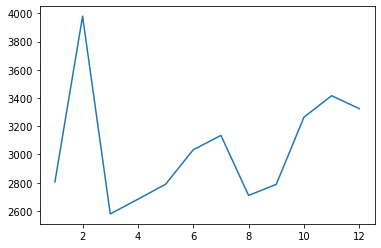

In [923]:
import matplotlib.pyplot as plt
plt.plot(months,meanTime)

In [932]:
l=len(meanTime)
m=(l*(meanTime*months).sum()-meanTime.sum()*months.sum())/(l*(months*months).sum()-(months.sum()*months.sum()))
m

20.380300839452207

## Section 2: 8 What is the area, in square kilometers, of the largest district measured in this manner?

In [944]:
dfLoc=dfMergedDeDup.reset_index()

In [1031]:
import re
import statistics
lat=[]
long=[]
A=[]


#dfLoc.groupby('PoliceDistrict')['Location']
for i in range(1,9):
    lat=[]
    long=[]
    for item in dfLoc[dfLoc['PoliceDistrict']==i]['Location']:
        x=re.findall("\d+\.\d+", item)
        #print(x)
        if bool(x)==True:
            lat.append(float(x[0]))
            long.append(float(x[1]))
    A.append(np.pi*statistics.stdev(long)*statistics.stdev(lat))

In [1035]:
A

[2041.715407093762,
 2021.845949596729,
 2034.0525567487723,
 2191.623672479558,
 2121.8780822397634,
 1979.7100738293116,
 2046.2261902172734,
 1924.7138972416337]

____________________________________________________________________________________________________________
____________________________________________________________________________________________________________
____________________________________________________________________________________________________________